# Part 1 — Data Preprocessing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Reading the dataset

In [2]:
startups_df = pd.read_csv('50_Startups.csv')


In [3]:
startups_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#To check number of rows and columns
startups_df.shape

(50, 5)

In [5]:
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Check Null Values

In [6]:
#check how many null values are there in the dataset
startups_df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## Check and Remove Outliers


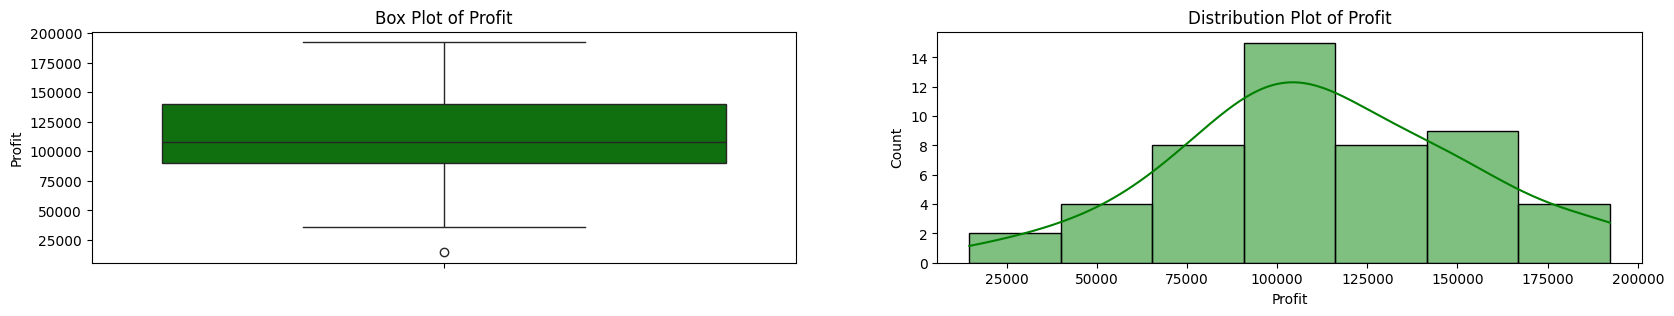

In [7]:
#We have one outlier as shown below
# Set the size of the entire figure
plt.figure(figsize=(20, 3))

plt.subplot(1, 2, 1)
sns.boxplot(startups_df['Profit'], color='green')
plt.title('Box Plot of Profit')
plt.subplot(1, 2, 2)
sns.histplot(startups_df['Profit'], color='green', kde=True)  # kde for a smooth curve
plt.title('Distribution Plot of Profit')

plt.show()

In [8]:
# Now we will locate the outlier and remove it.

startups_df[startups_df['Profit']<25000]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [9]:
startups_df[startups_df['R&D Spend']<10000]

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [10]:
#After observing few startup data above, We can see that for Index 49 (the Outlier) there may be some error in Profit, Since Profit for other startups with no R&D Spend is much higher than index 49
#We will be removing the outlier from the dataset
startups_df.drop(index=49,axis=0,inplace=True)
startups_df.shape

(49, 5)

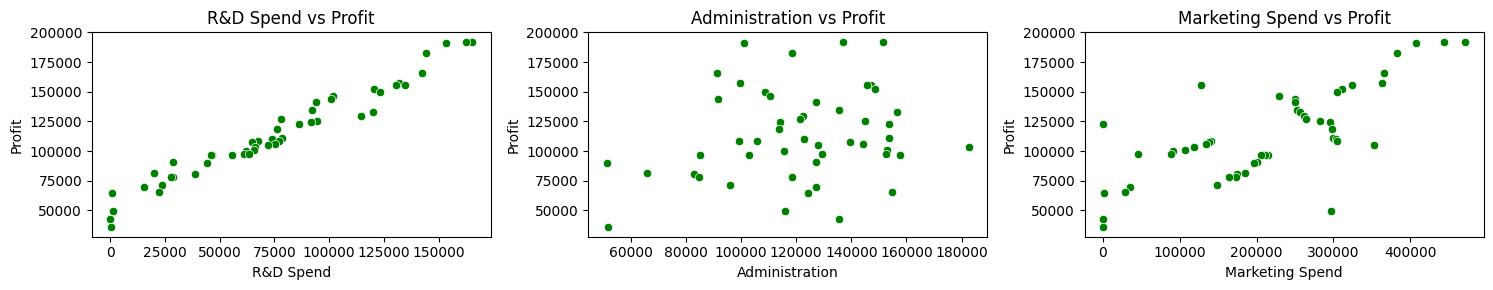

In [11]:
#Distribution Plot of independent variables and it seems  all variables are Normally distributed now.
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),startups_df.columns):
    plt.subplot(1,4,i)
    sns.scatterplot(x=col,y='Profit',data=startups_df,color='green')
    plt.title(f"{col} vs Profit")
    plt.tight_layout()

<Axes: title={'center': 'Correlation Matrix'}>

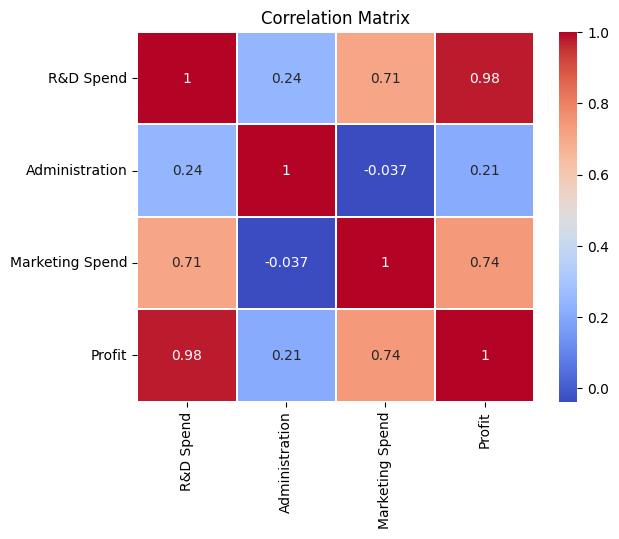

In [12]:
#we can see that R&D is highly linearly correalted with Profit
#let us look at correlation matrix
plt.title("Correlation Matrix")
sns.heatmap(data=startups_df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.1)

#### We observe a strong correlation between R&D Spend and Profit, with coefficients of 0.98, as well as between Marketing Spend and Profit, with coefficients of 0.74. Conversely, the correlation between Administration Spend and Profit is considerably weaker, suggesting that this feature may not significantly contribute to our model.
#### Furthermore, there is a notable correlation of 0.71 between R&D Spend and Marketing Spend, indicating the presence of multicollinearity among the independent variables. We cannot have Multicollinearity

In [13]:
#droping column Marketing Spend due to its Multicollinearity with R&D Spend
#droping column Admiinstratio due to its  very low correlation with Proit
startups_df1 = startups_df.drop(columns=['Marketing Spend','Administration'],axis=1)
startups_df1.head()

,R&D Spend,State,Profit
0,165349.20,New York,192261.83
1,162597.70,California,191792.06
2,153441.51,Florida,191050.39
3,144372.41,New York,182901.99
4,142107.34,Florida,166187.94


<Axes: >

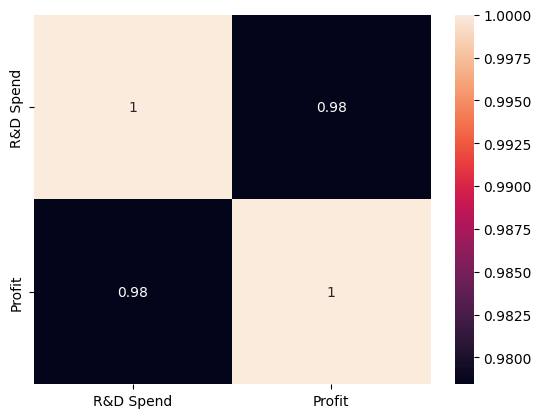

In [14]:
sns.heatmap(startups_df1.corr(),annot=True)

## Converting the categorical variable to dummy variable

In [15]:
#We have one categorical variable, which is "State"
# Let's explore and analyse it
startups_df1.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [16]:
#There are three unique states and their counts are given below. They are equally distributed.
startups_df1.groupby('State')['State'].count()

State
California    16
Florida       16
New York      17
Name: State, dtype: int64

In [17]:
#We will convert this column into dummy variables
startups_df1 = pd.get_dummies(data=startups_df1)
startups_df1.head()


,R&D Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,192261.83,0,0,1
1,162597.70,191792.06,1,0,0
2,153441.51,191050.39,0,1,0
3,144372.41,182901.99,0,0,1
4,142107.34,166187.94,0,1,0


In [18]:
#To avoid dummy variable Trap, we will drop one dummy variable. Let us remove California
startups_df2 = startups_df1.drop(labels=['State_California'],axis=1)
startups_df2.head()

,R&D Spend,Profit,State_Florida,State_New York
0,165349.20,192261.83,0,1
1,162597.70,191792.06,0,0
2,153441.51,191050.39,1,0
3,144372.41,182901.99,0,1
4,142107.34,166187.94,1,0
